#### [Data set here :](https://docs.google.com/spreadsheets/d/10kcltajshujxK_yml1AI4HZ0PyEq7bZT/edit?usp=sharing&ouid=104229799614244208979&rtpof=true&sd=true)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.tree import plot_tree
import seaborn as sns

In [2]:
df= pd.read_excel(r"Data_Train.xlsx")
pd.options.display.max_columns= None
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [5]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
df.dropna(inplace = True)

In [8]:
df.duplicated().sum()

220

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df['Additional_Info'].value_counts()

Additional_Info
No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [14]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [15]:
dic={'non-stop':0,
    '1 stop':1,
    '2 stops':2,
    '3 stops':3,
    '4 stops':4}
df['Total_Stops'] = df['Total_Stops'].map(dic)
df['Total_Stops'].value_counts()

Total_Stops
1    5625
0    3475
2    1318
3      43
4       1
Name: count, dtype: int64

In [16]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'], infer_datetime_format=True)

C:\Users\Dina\AppData\Local\Temp\ipykernel_17996\3106403079.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'], infer_datetime_format=True)
C:\Users\Dina\AppData\Local\Temp\ipykernel_17996\3106403079.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'], infer_datetime_format=True)


In [17]:
df['month']=df['Date_of_Journey'].dt.month.astype(str)

df['day']=df['Date_of_Journey'].dt.day.astype(str)

In [21]:
df['Duration'].head(50)

0      2h 50m
1      7h 25m
2         19h
3      5h 25m
4      4h 45m
5      2h 25m
6     15h 30m
7      21h 5m
8     25h 30m
9      7h 50m
10    13h 15m
11     2h 35m
12     2h 15m
13    12h 10m
14     2h 35m
15    26h 35m
16     4h 30m
17    22h 35m
18        23h
19    20h 35m
20     5h 10m
21    15h 20m
22     2h 50m
23     2h 55m
24    13h 20m
25    15h 10m
26     5h 45m
27     5h 55m
28     2h 50m
29     2h 15m
30     2h 15m
31    13h 25m
32     2h 50m
33        22h
34     5h 30m
35    10h 25m
36     5h 15m
37     2h 30m
38     6h 15m
39    11h 55m
40     11h 5m
41     8h 30m
42     22h 5m
43     2h 45m
44        12h
45     2h 50m
46     2h 50m
47     2h 15m
48     16h 5m
49    19h 55m
Name: Duration, dtype: object

In [22]:
df['Duration_hour']=df['Duration'].str.split('h').str[0]

In [24]:
df['Duration_hour'].head(50)

0      2
1      7
2     19
3      5
4      4
5      2
6     15
7     21
8     25
9      7
10    13
11     2
12     2
13    12
14     2
15    26
16     4
17    22
18    23
19    20
20     5
21    15
22     2
23     2
24    13
25    15
26     5
27     5
28     2
29     2
30     2
31    13
32     2
33    22
34     5
35    10
36     5
37     2
38     6
39    11
40    11
41     8
42    22
43     2
44    12
45     2
46     2
47     2
48    16
49    19
Name: Duration_hour, dtype: object

In [25]:
df['Duration_min']= df['Duration'].str.split('h').str[1]

In [26]:
df['Duration_min'].head(50)

0      50m
1      25m
2         
3      25m
4      45m
5      25m
6      30m
7       5m
8      30m
9      50m
10     15m
11     35m
12     15m
13     10m
14     35m
15     35m
16     30m
17     35m
18        
19     35m
20     10m
21     20m
22     50m
23     55m
24     20m
25     10m
26     45m
27     55m
28     50m
29     15m
30     15m
31     25m
32     50m
33        
34     30m
35     25m
36     15m
37     30m
38     15m
39     55m
40      5m
41     30m
42      5m
43     45m
44        
45     50m
46     50m
47     15m
48      5m
49     55m
Name: Duration_min, dtype: object

In [27]:
df['Duration_min']= df['Duration_min'].str.replace('m','')

In [29]:
df['Duration_min'].head(50)

0      50
1      25
2        
3      25
4      45
5      25
6      30
7       5
8      30
9      50
10     15
11     35
12     15
13     10
14     35
15     35
16     30
17     35
18       
19     35
20     10
21     20
22     50
23     55
24     20
25     10
26     45
27     55
28     50
29     15
30     15
31     25
32     50
33       
34     30
35     25
36     15
37     30
38     15
39     55
40      5
41     30
42      5
43     45
44       
45     50
46     50
47     15
48      5
49     55
Name: Duration_min, dtype: object

In [30]:
df[~df['Duration_hour'].str.isdigit()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day,Duration_hour,Duration_min
6474,Air India,2019-03-06,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2,No info,17327,3,6,5m,NaN


In [31]:
df.loc[6474, 'Duration_hour']= 0
df.loc[6474, 'Duration_min']= 5

In [32]:
df['Duration_hour']=df['Duration_hour'].astype(int)

In [33]:
df[df['Duration_min']=='']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day,Duration_hour,Duration_min
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,6,9,19,
18,Air India,2019-06-12,Delhi,Cochin,DEL → CCU → BOM → COK,20:15,19:15 13 Jun,23h,2,No info,13381,6,12,23,
33,Jet Airways,2019-06-15,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,12:35 16 Jun,22h,2,In-flight meal not included,10919,6,15,22,
44,Multiple carriers,2019-03-21,Delhi,Cochin,DEL → BOM → COK,09:00,21:00,12h,1,No info,13062,3,21,12,
53,IndiGo,2019-06-18,Banglore,Delhi,BLR → DEL,21:15,00:15 19 Jun,3h,0,No info,3943,6,18,3,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10571,Air India,2019-05-24,Kolkata,Banglore,CCU → BOM → AMD → BLR,09:25,05:25 25 May,20h,2,No info,14897,5,24,20,
10591,Jet Airways,2019-06-12,Delhi,Cochin,DEL → ATQ → BOM → COK,20:00,19:00 13 Jun,23h,2,No info,14300,6,12,23,
10638,Jet Airways,2019-03-21,Banglore,New Delhi,BLR → BOM → DEL,21:25,11:25 19 Mar,14h,1,In-flight meal not included,7832,3,21,14,
10639,Air India,2019-06-03,Delhi,Cochin,DEL → RPR → NAG → BOM → COK,05:15,19:15 04 Jun,38h,3,No info,10493,6,3,38,


In [34]:
indices = df[df['Duration_min']==''].index

In [35]:
df.loc[indices, 'Duration_min']= 0

In [36]:
df['Duration_min']=df['Duration_min'].astype(int)

In [37]:
df['Duration_min']= df['Duration_hour']*60+df['Duration_min']

In [38]:
df.drop(columns=['Duration_hour', 'Duration'], inplace=True)

In [39]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,month,day,Duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,0,No info,3897,3,24,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2,No info,7662,5,1,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2,No info,13882,6,9,1140
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1,No info,6218,5,12,325
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1,No info,13302,3,1,285


In [40]:
df['Arrival_Time']

0        01:10 22 Mar
1               13:15
2        04:25 10 Jun
3               23:30
4               21:35
             ...     
10678           22:25
10679           23:20
10680           11:20
10681           14:10
10682           19:15
Name: Arrival_Time, Length: 10462, dtype: object

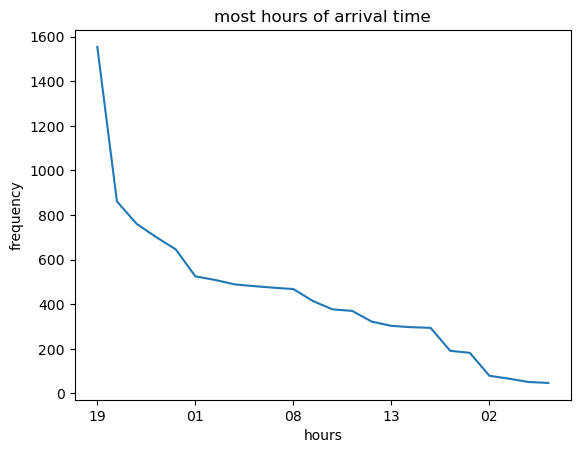

In [41]:
df['Arrival_Time'].str[:2].value_counts().plot(kind='line')
plt.xlabel('hours')
plt.ylabel('frequency')
plt.title("most hours of arrival time");

In [42]:
df['Dep_Time']

0        22:20
1        05:50
2        09:25
3        18:05
4        16:50
         ...  
10678    19:55
10679    20:45
10680    08:20
10681    11:30
10682    10:55
Name: Dep_Time, Length: 10462, dtype: object

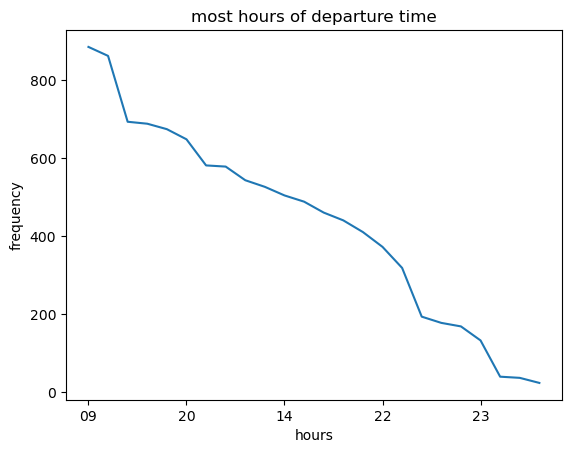

In [43]:
df['Dep_Time'].str[:2].value_counts().plot(kind='line')
plt.xlabel('hours')
plt.ylabel('frequency')
plt.title("most hours of departure time");

C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


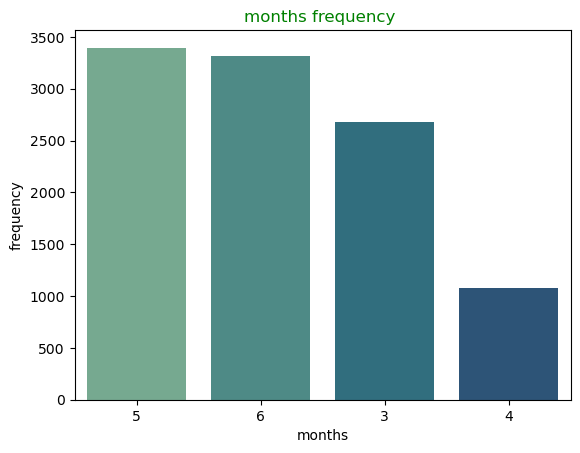

In [44]:
chart=sns.countplot(x='month', data=df, palette='crest', order = df['month'].value_counts().index)
plt.xlabel('months')
plt.ylabel('frequency')
plt.title("months frequency ", color='green');

C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


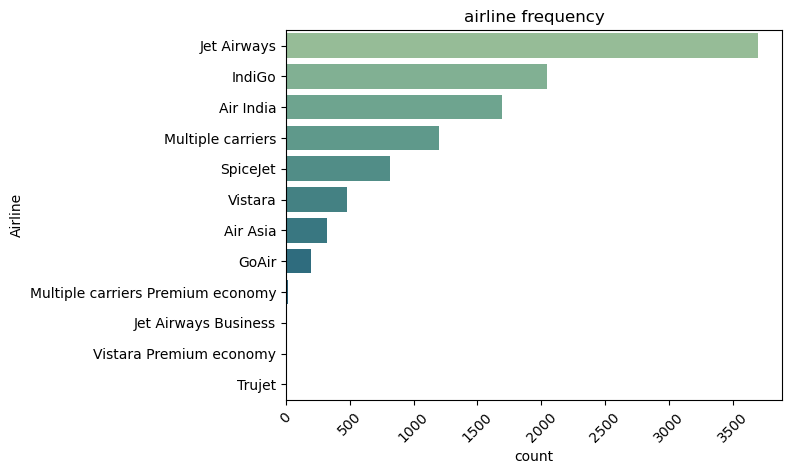

In [45]:
chart=sns.countplot(y='Airline',data=df,palette='crest', order = df['Airline'].value_counts().index)
plt.title("airline frequency")
plt.xticks(rotation=45);

C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


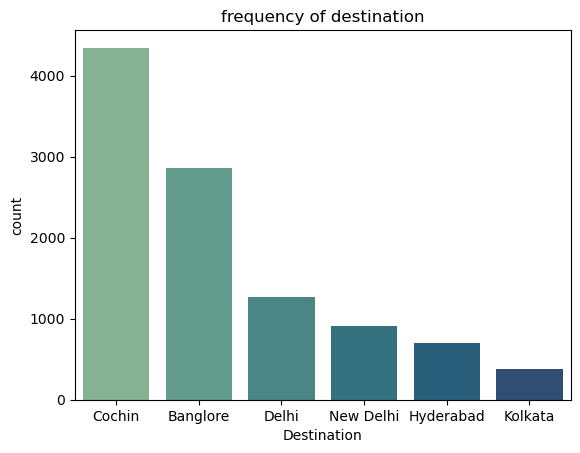

In [46]:
sns.countplot(x='Destination',data=df,palette='crest', order = df['Destination'].value_counts().index).set(title='frequency of destination');

C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


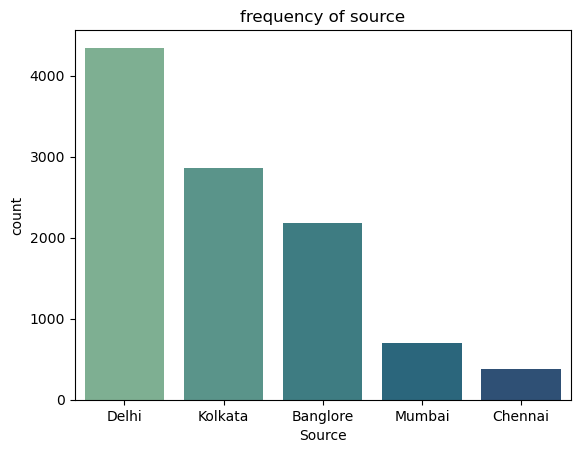

In [47]:
sns.countplot(x='Source',data=df,palette='crest', order = df['Source'].value_counts().index).set(title='frequency of source');

C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


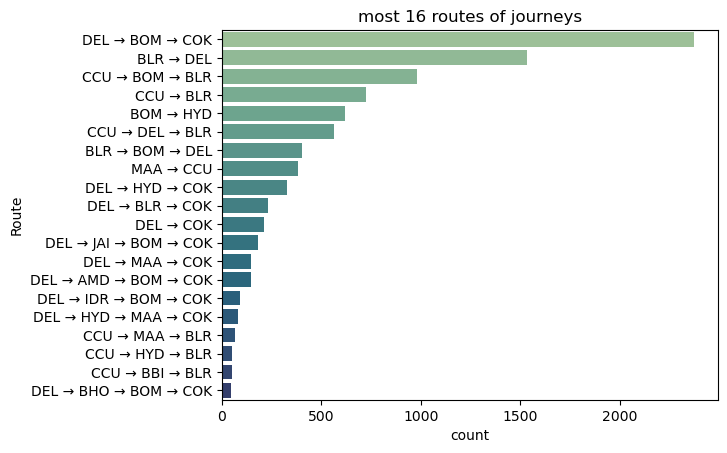

In [48]:
chart=sns.countplot(y='Route',data=df,palette='crest', order = df['Route'].value_counts()[:20].index)
plt.title("most 16 routes of journeys");

In [49]:
df['Route'].nunique()

128

In [50]:
df['Len_Route']= df['Route'].apply(lambda i :len(i.split('→')))
df.drop(columns=['Route'], inplace= True)

In [51]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time',
       'Arrival_Time', 'Total_Stops', 'Additional_Info', 'Price', 'month',
       'day', 'Duration_min', 'Len_Route'],
      dtype='object')

In [52]:
df['Airline'].nunique()

12

In [53]:
df.drop(columns=['Date_of_Journey','Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [54]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,month,day,Duration_min,Len_Route
0,IndiGo,Banglore,New Delhi,0,No info,3897,3,24,170,2
1,Air India,Kolkata,Banglore,2,No info,7662,5,1,445,4
2,Jet Airways,Delhi,Cochin,2,No info,13882,6,9,1140,4
3,IndiGo,Kolkata,Banglore,1,No info,6218,5,12,325,3
4,IndiGo,Banglore,New Delhi,1,No info,13302,3,1,285,3


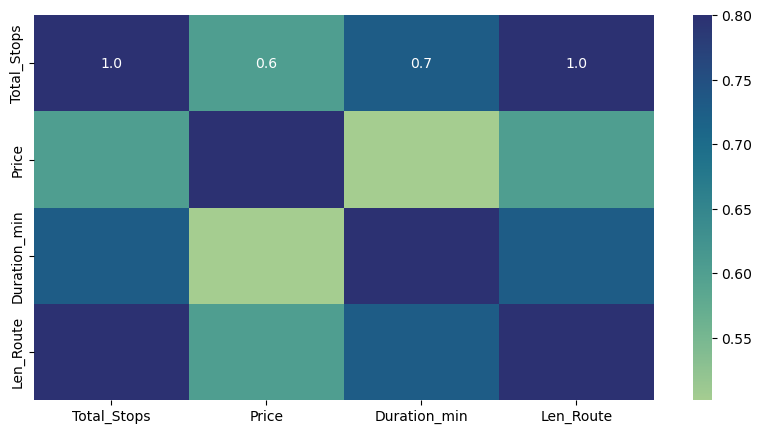

In [57]:
# Exclude non-numeric columns from the correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation, vmin=None, vmax=0.8, cmap='crest', annot=True, fmt='.1f', linecolor='white', cbar=True)
plt.show()


In [56]:

non_numeric_columns = df.select_dtypes(exclude=['number']).columns.tolist()

print("Non-numeric columns:")
print(non_numeric_columns)


Non-numeric columns:
['Airline', 'Source', 'Destination', 'Additional_Info', 'month', 'day']


In [58]:
df.drop(columns='Total_Stops', inplace= True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Source           10462 non-null  object
 2   Destination      10462 non-null  object
 3   Additional_Info  10462 non-null  object
 4   Price            10462 non-null  int64 
 5   month            10462 non-null  object
 6   day              10462 non-null  object
 7   Duration_min     10462 non-null  int32 
 8   Len_Route        10462 non-null  int64 
dtypes: int32(1), int64(2), object(6)
memory usage: 1.0+ MB


In [60]:
df['month']= df['month'].astype(int)
df['day']= df['day'].astype(int)

In [61]:
df=pd.get_dummies(df)

In [62]:
df.head()

,Price,month,day,Duration_min,Len_Route,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,3897,3,24,170,2,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
1,7662,5,1,445,4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,13882,6,9,1140,4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,6218,5,12,325,3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,13302,3,1,285,3,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False


In [64]:
X=df.drop(columns=['Price'])
y=df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=24)

In [65]:
CV = []
train_scores = []
test_scores = []

def pred_model(model):
    # Training model
    model.fit(X_train,y_train)
            
    y_pred_train=model.predict(X_train)
    
    # score of test set
    y_pred_test=model.predict(X_test)
    
    # train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    
    # Printing results
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    print("Mean r2 score for train :",r2_score(y_train,y_pred_train))
    print("Mean r2 score for test :",r2_score(y_test,y_pred_test))

In [66]:
rf = RandomForestRegressor()
pred_model(rf)

Train CV scores : [0.88665075 0.83004063 0.83369153 0.8750524  0.80986222]
Train CV mean : 0.85
Mean r2 score for train : 0.965540602674067
Mean r2 score for test : 0.8154098886038913


In [68]:
dic={'max_depth': [20, 50, 100],
    'max_features': ['sqrt', 'log2'],
    'n_estimators': [20, 50, 100]}

# Creating GridSearchCV to find the best estimator of hyperparameter
GSRF = GridSearchCV(estimator = rf, param_grid=dic)
pred_model(GSRF)
print("best: parameters:", GSRF.best_params_)

Train CV scores : [0.87724989 0.78991685 0.8169952  0.85184251 0.79577074]
Train CV mean : 0.83
Mean r2 score for train : 0.9547351226848638
Mean r2 score for test : 0.8331306676906695
best: parameters: {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}
